In [1]:
'''
1. 获取数据
2. 数据基本处理
3. 特征工程
4. 机器学习（决策树）
5. 模型评估
'''

'\n1. 获取数据\n2. 数据基本处理\n3. 特征工程\n4. 机器学习（决策树）\n5. 模型评估\n'

In [2]:
import pandas as pd 
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import graphviz

In [3]:
# 1.获取数据
wine = load_wine()

In [4]:
# 2. 数据基本处理
# 2.1 观察数据属性 wine, wine.target, wine.data,.....
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
# 2.2 数据可视化
wineframe = pd.DataFrame(data=wine.data,columns=wine.feature_names)
wineframe['tag'] = wine.target
wineframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,tag
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
wineframe.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,tag
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [7]:
# 2.3 数据集划分
x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.3) 

In [8]:
x_train.shape

(124, 13)

In [9]:
wine.data.shape

(178, 13)

In [25]:
# 4. 机器学习（决策树）
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,max_depth=3
                                 ) 
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [11]:
# 5. 模型评估
y_pre = clf.predict(x_test)
print(y_pre)

[0 0 1 1 1 0 0 0 2 2 1 1 0 1 0 0 1 0 0 1 2 2 1 1 1 1 2 0 0 1 0 0 1 0 1 2 0
 2 2 0 1 0 1 1 0 1 1 0 1 0 2 2 0 2]


In [12]:
clf.apply(x_test)

array([13, 13,  4, 11,  8, 13, 13, 13,  2,  2,  8,  8, 13,  4, 13, 13,  4,
       13, 13,  8,  2,  2,  8, 14,  4,  8,  5, 13, 13,  8, 13, 13,  8, 13,
        8,  2, 13,  2,  2, 13,  8, 13,  8,  8, 13,  8,  8, 13,  4, 13,  2,
        2, 13,  2], dtype=int64)

In [13]:
result = clf.score(x_test, y_test)
print(result)

0.9259259259259259


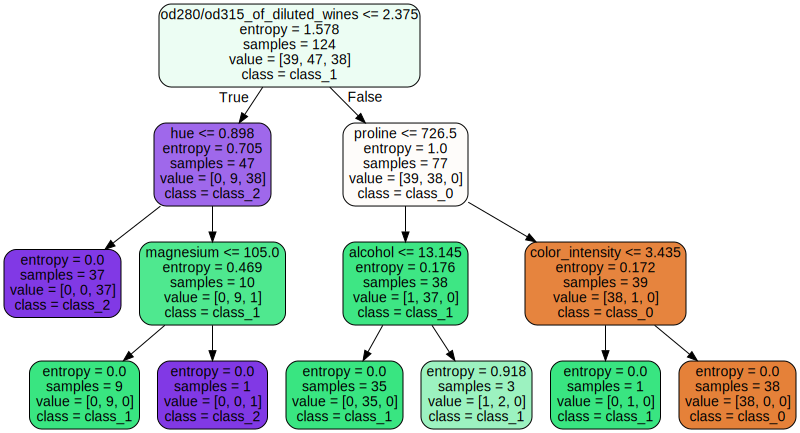

In [26]:
# 生成决策树
dot_data = tree.export_graphviz(clf 
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True 
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [15]:
clf.feature_importances_

array([0.02001292, 0.02396469, 0.        , 0.        , 0.03428384,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15932346, 0.43738274, 0.32503235])

In [16]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.020012921598548096),
 ('malic_acid', 0.023964692930677354),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.034283838930040535),
 ('total_phenols', 0.0),
 ('flavanoids', 0.0),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.15932346149818935),
 ('od280/od315_of_diluted_wines', 0.43738273549169127),
 ('proline', 0.3250323495508535)]

0.8888888888888888


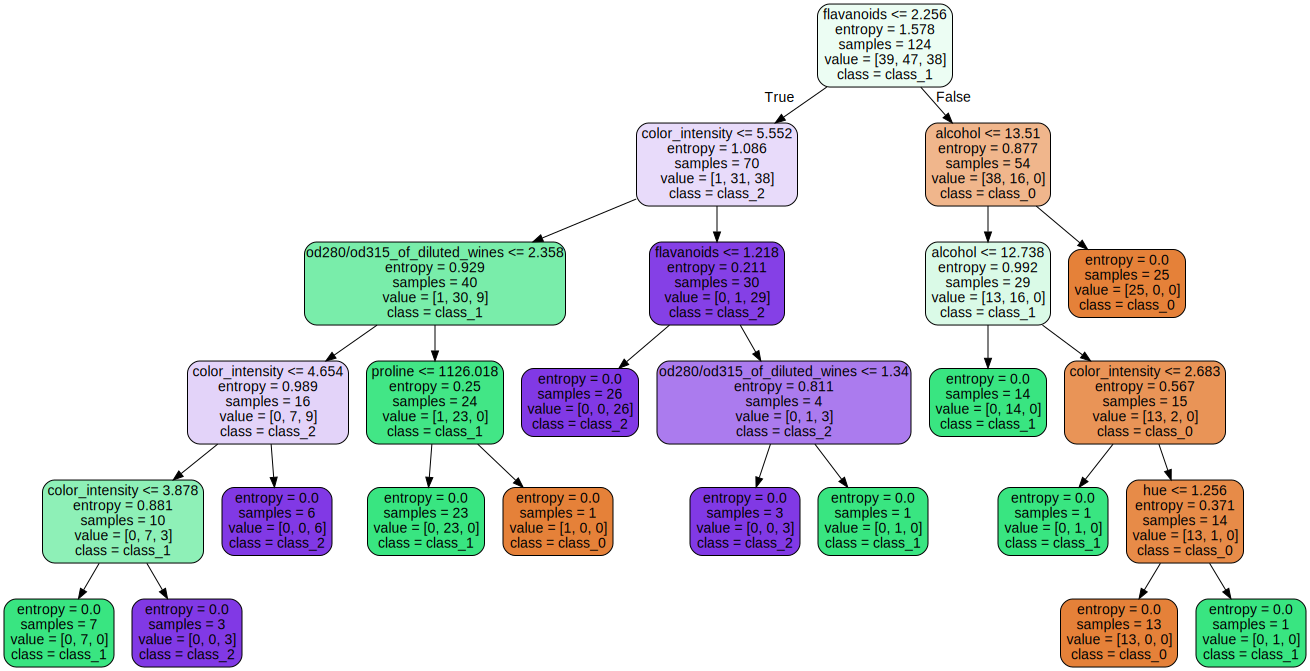

In [17]:
# 参数探索
clf = tree.DecisionTreeClassifier(criterion="entropy"
                            #,random_state=30
                            ,splitter='random'
                            #,max_depth=3
                            #,min_samples_leaf=4
                            #,min_samples_split=10
                                 ) 
clf.fit(x_train, y_train)
result = clf.score(x_test, y_test)
print(result)
dot_data = tree.export_graphviz(clf 
                                ,feature_names=wine.feature_names
                                ,class_names=wine.target_names
                                ,filled=True 
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [18]:
# 判断拟合程度
result_train = clf.score(x_train,y_train)
result = clf.score(x_test, y_test)
print('训练准确率：{},测试准确率：{}'.format(result_train,result))

训练准确率：1.0,测试准确率：0.8888888888888888
